In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.shape

(30, 17)

Here there is total 17 columns out of which 16 columns is an features and 1 column is an target which is an W means wins prediction.

and there is total 30 records

In [4]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no null values in any of the columns

<AxesSubplot:>

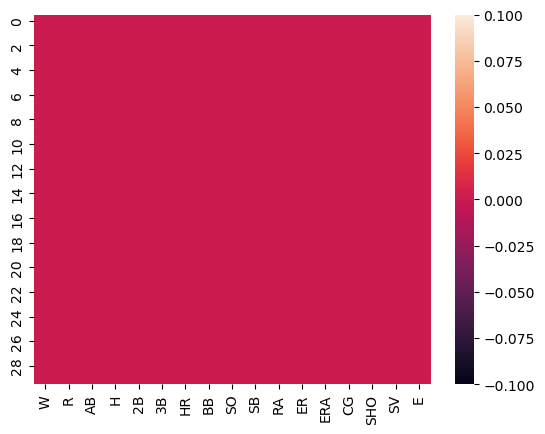

In [5]:
sns.heatmap(df.isnull())

By observing heatmap we can say that there is no null values

In [7]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Here all the columns having continous data

In [9]:
# check the unique values count of each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

Here there is no null values in any of the columns and at target variable there is not so many repeated values. Hence it is an Regression Problem and have to build the Regression ML models.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In info there is no null values and all the columns having number values and we have to predict the number of wins by considering 16 features and number is repeated values in W column is very low. Hence it is an regression problem so we have to build regression models and predict the number of wins(W)

In [11]:
df.duplicated().sum()

0

There is also no any duplicates rows found in our dataset

In [12]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is negative/invalid values present

from above description we can observe the following:

The count of all columns are same means there is no null values into the dataset

The Median(50%)percentile value is greater than the mean in R,2B,BB,SO,RA,ER,ERA,SHO,W which means data is skewed to left in these columns 

We also notice the Standard Deviation, MIN, 25%, 75% and max by description method

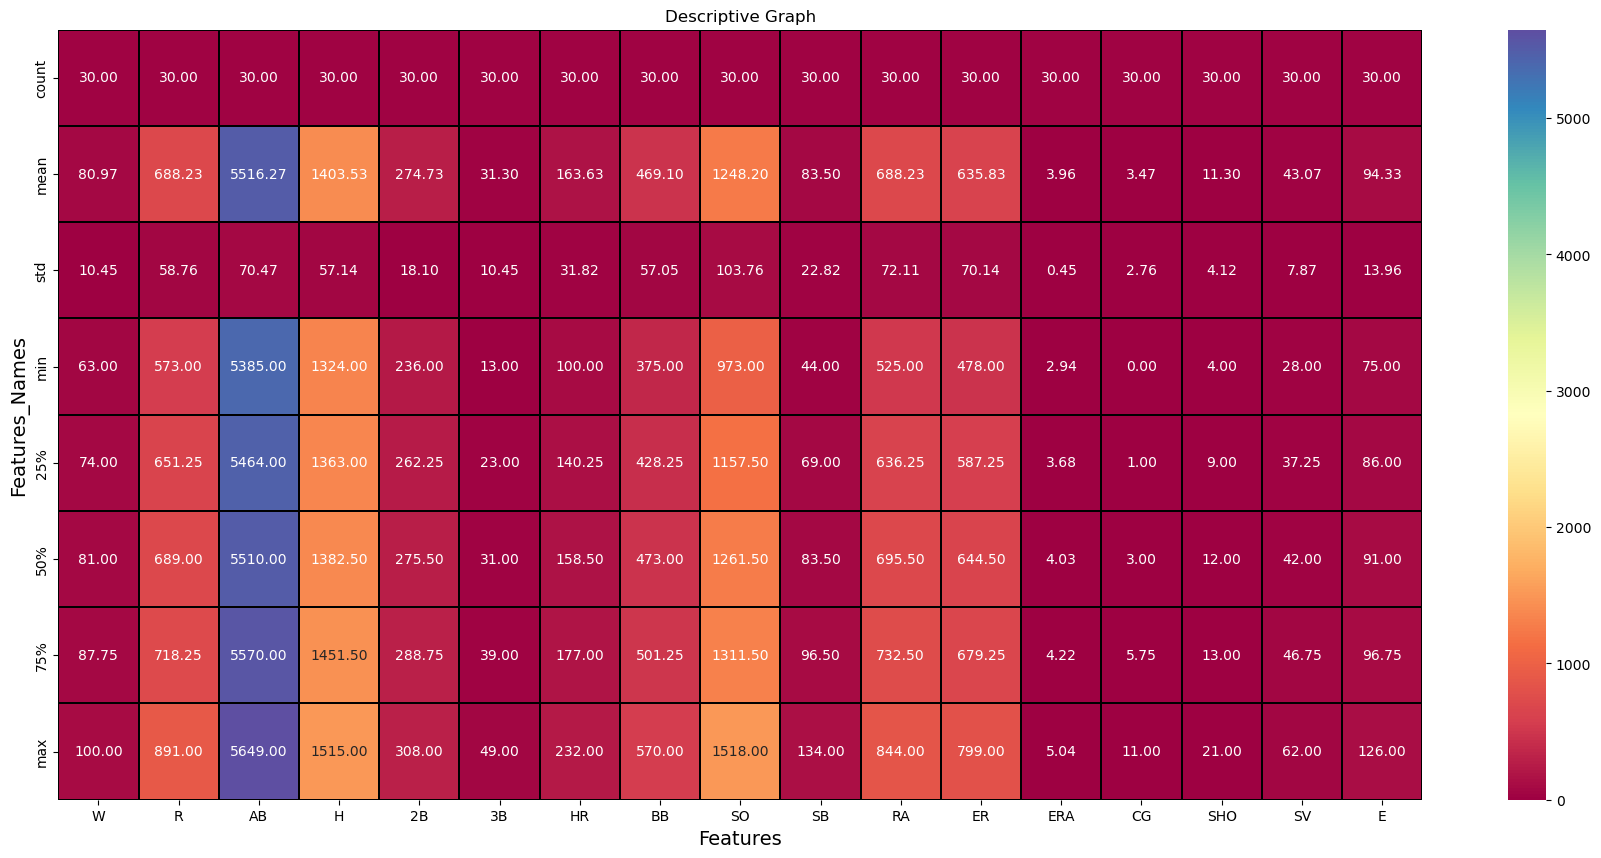

In [15]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True, cmap='Spectral', linecolor='black',linewidth=0.2, fmt='0.2f')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features_Names', fontsize=14)
plt.title('Descriptive Graph')
plt.show()

Data Visualization

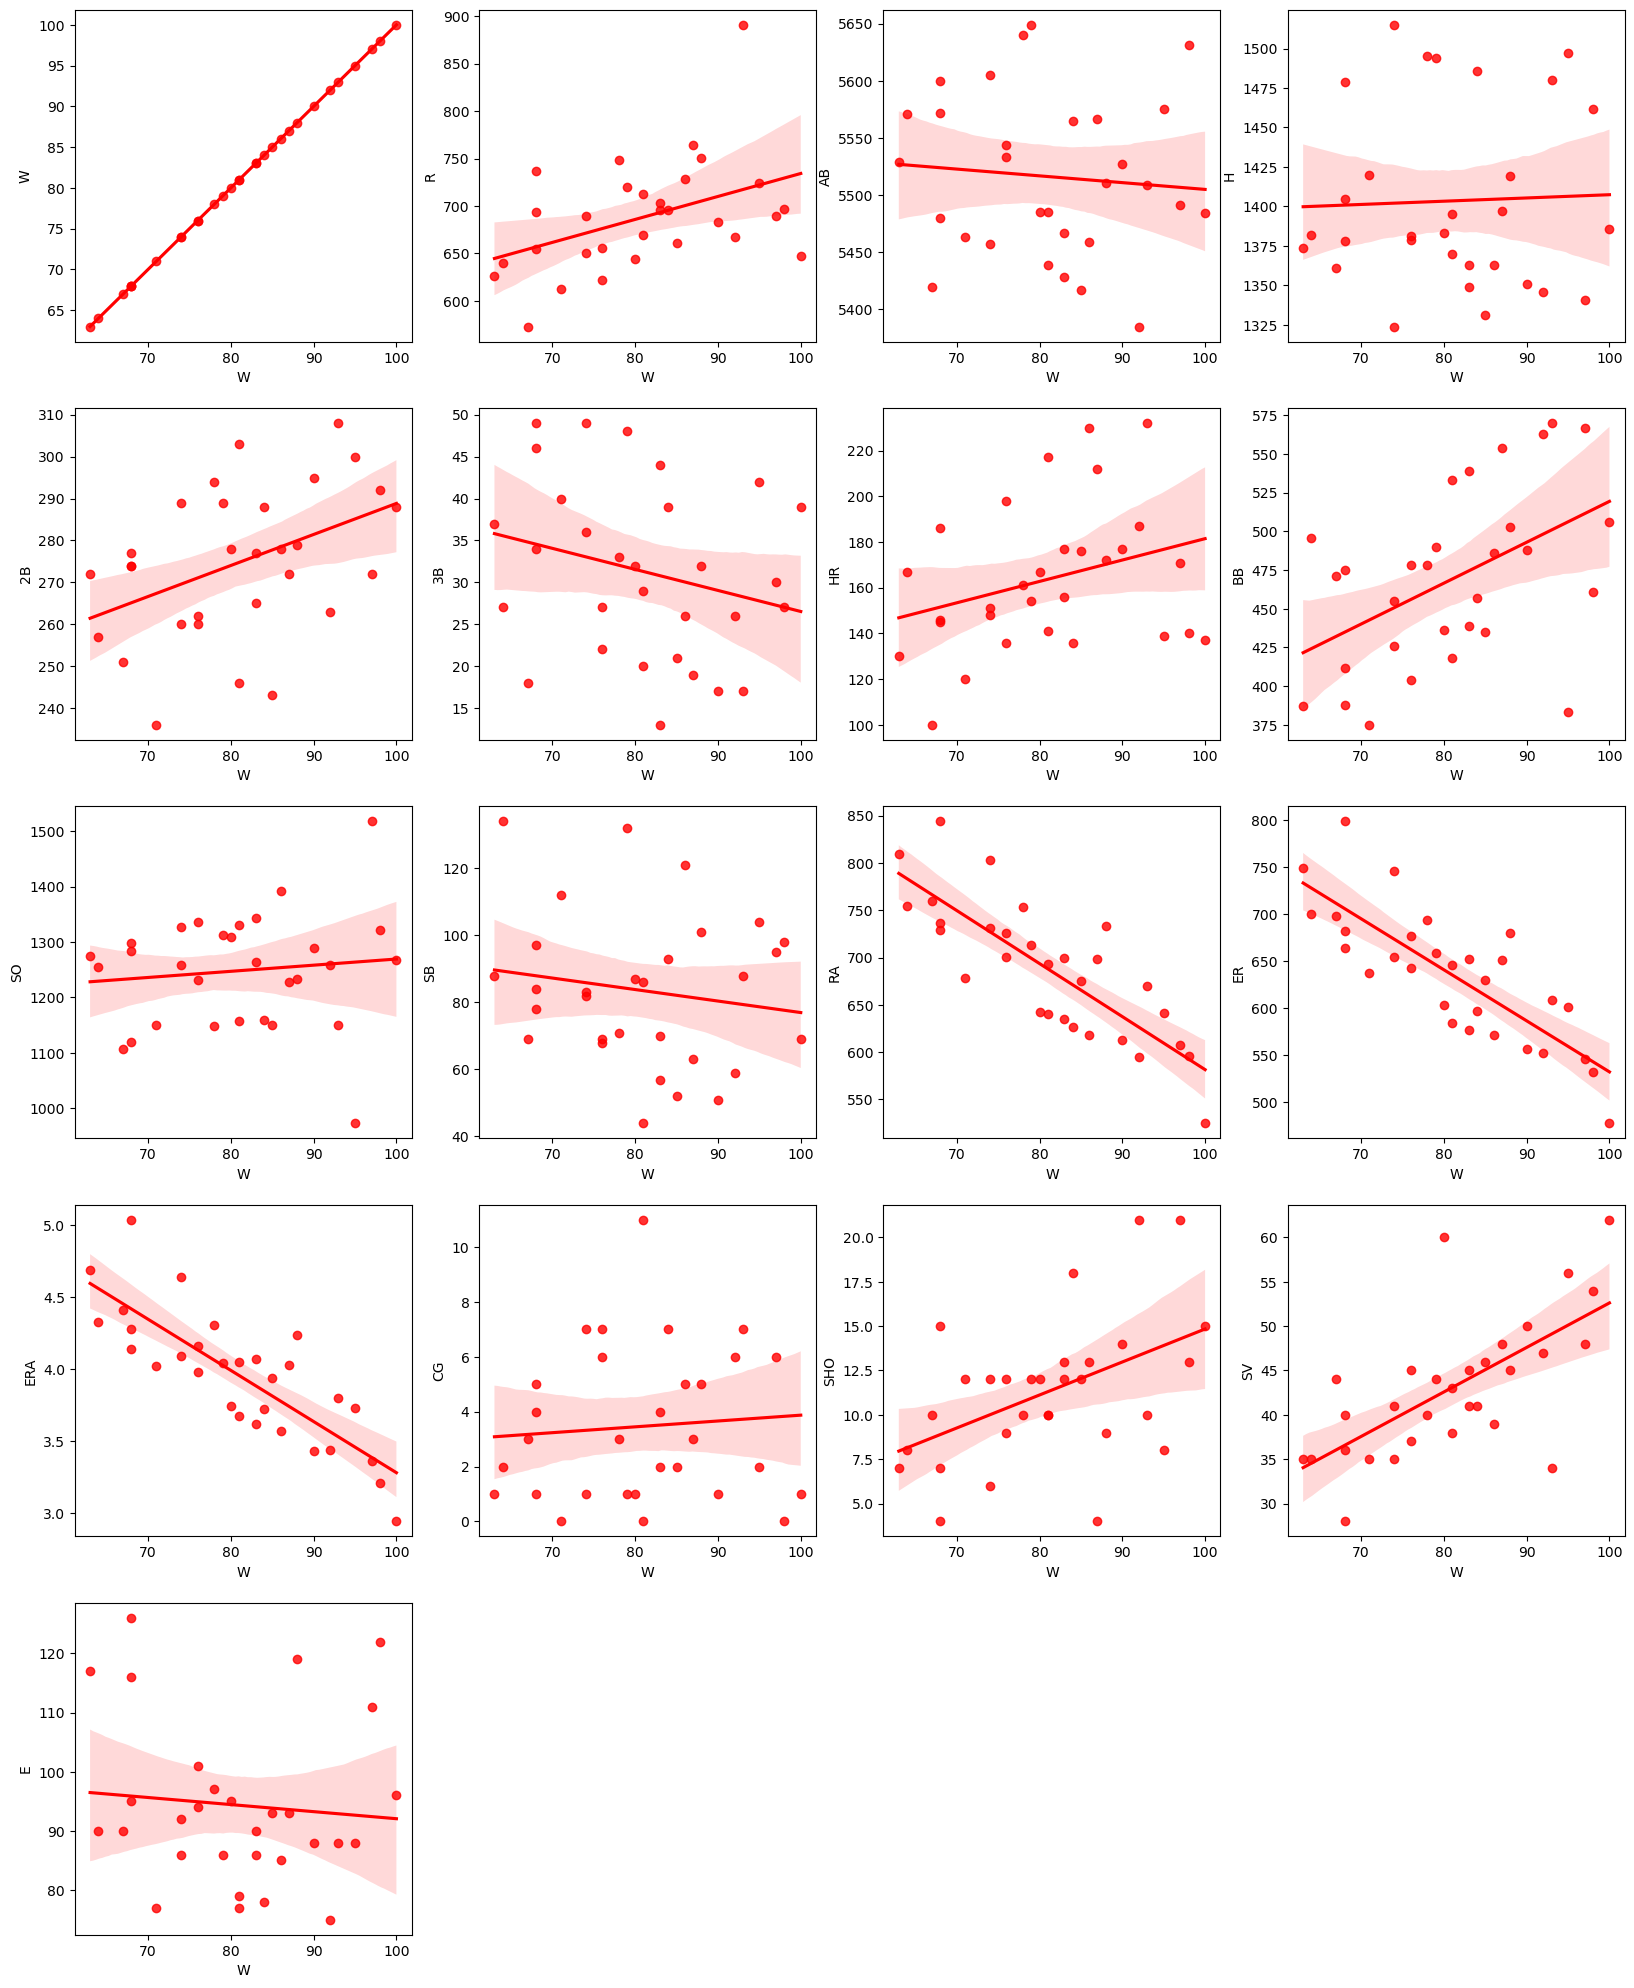

In [18]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='W',y=i,data=df,color='r')
        plt.xlabel('W')
        plt.ylabel(i)
        p+=1
plt.show()  

By using Regplot we can say that there is no relationship with the target variable as none of the columns record near to the best fit line. 

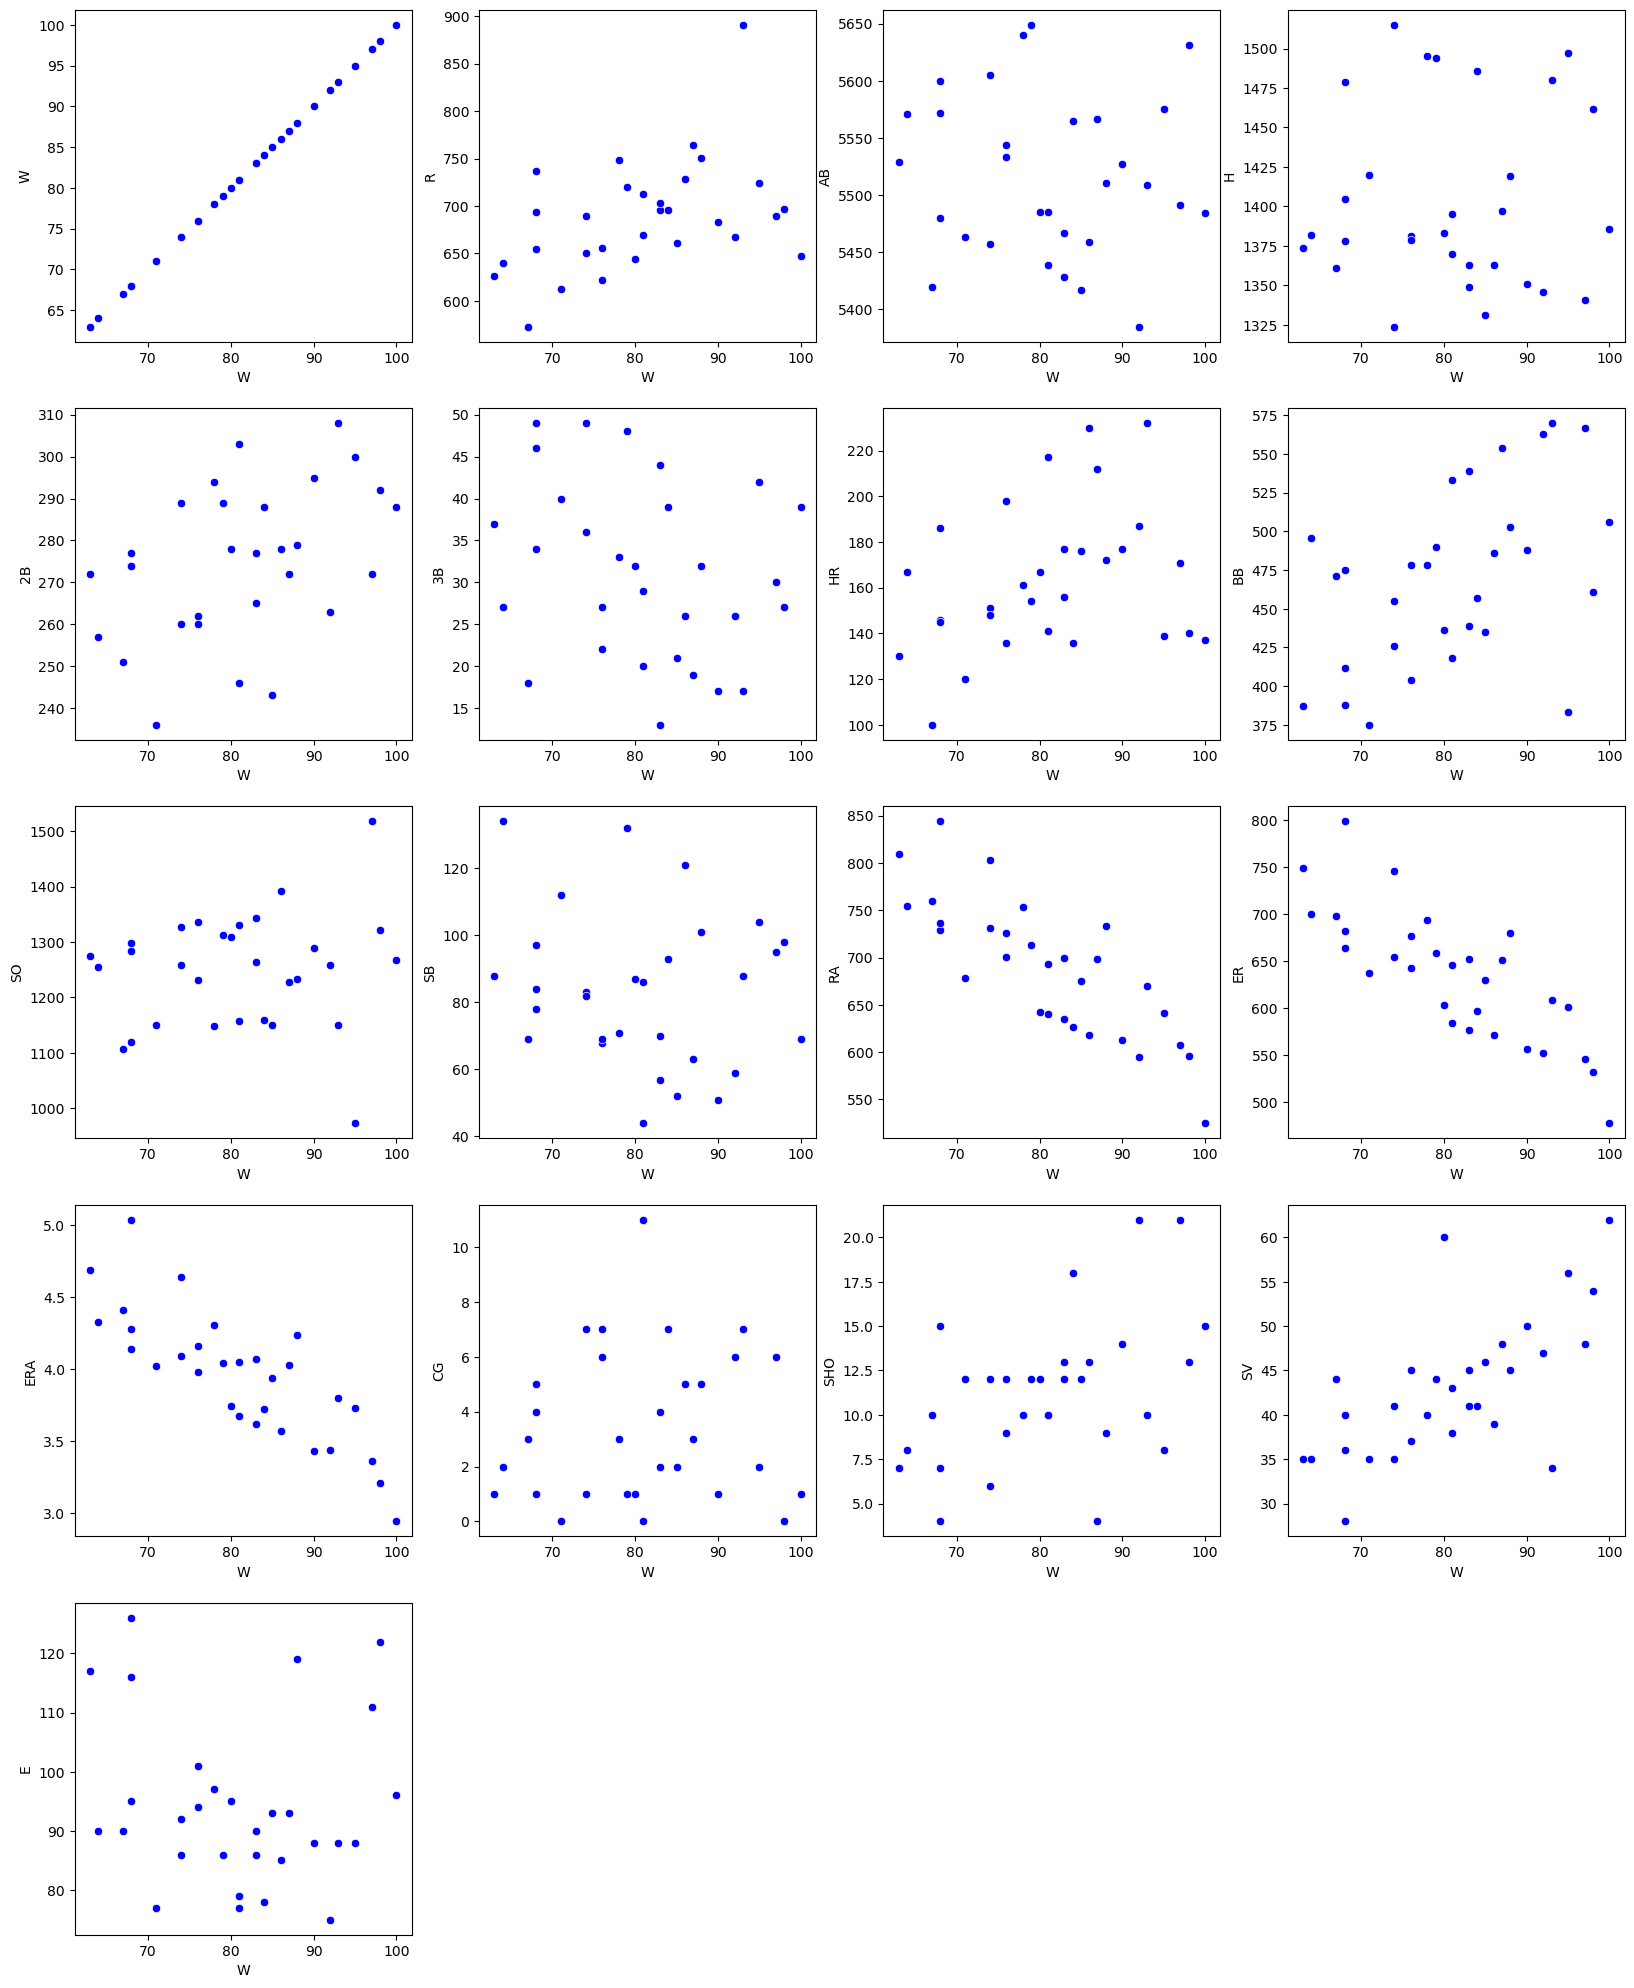

In [19]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='W',y=i,data=df,color='b')
        plt.xlabel('W')
        plt.ylabel(i)
        p+=1
plt.show()  

Same we are getting in scatterplot as we got in regplot. There is no relations with the target variable.

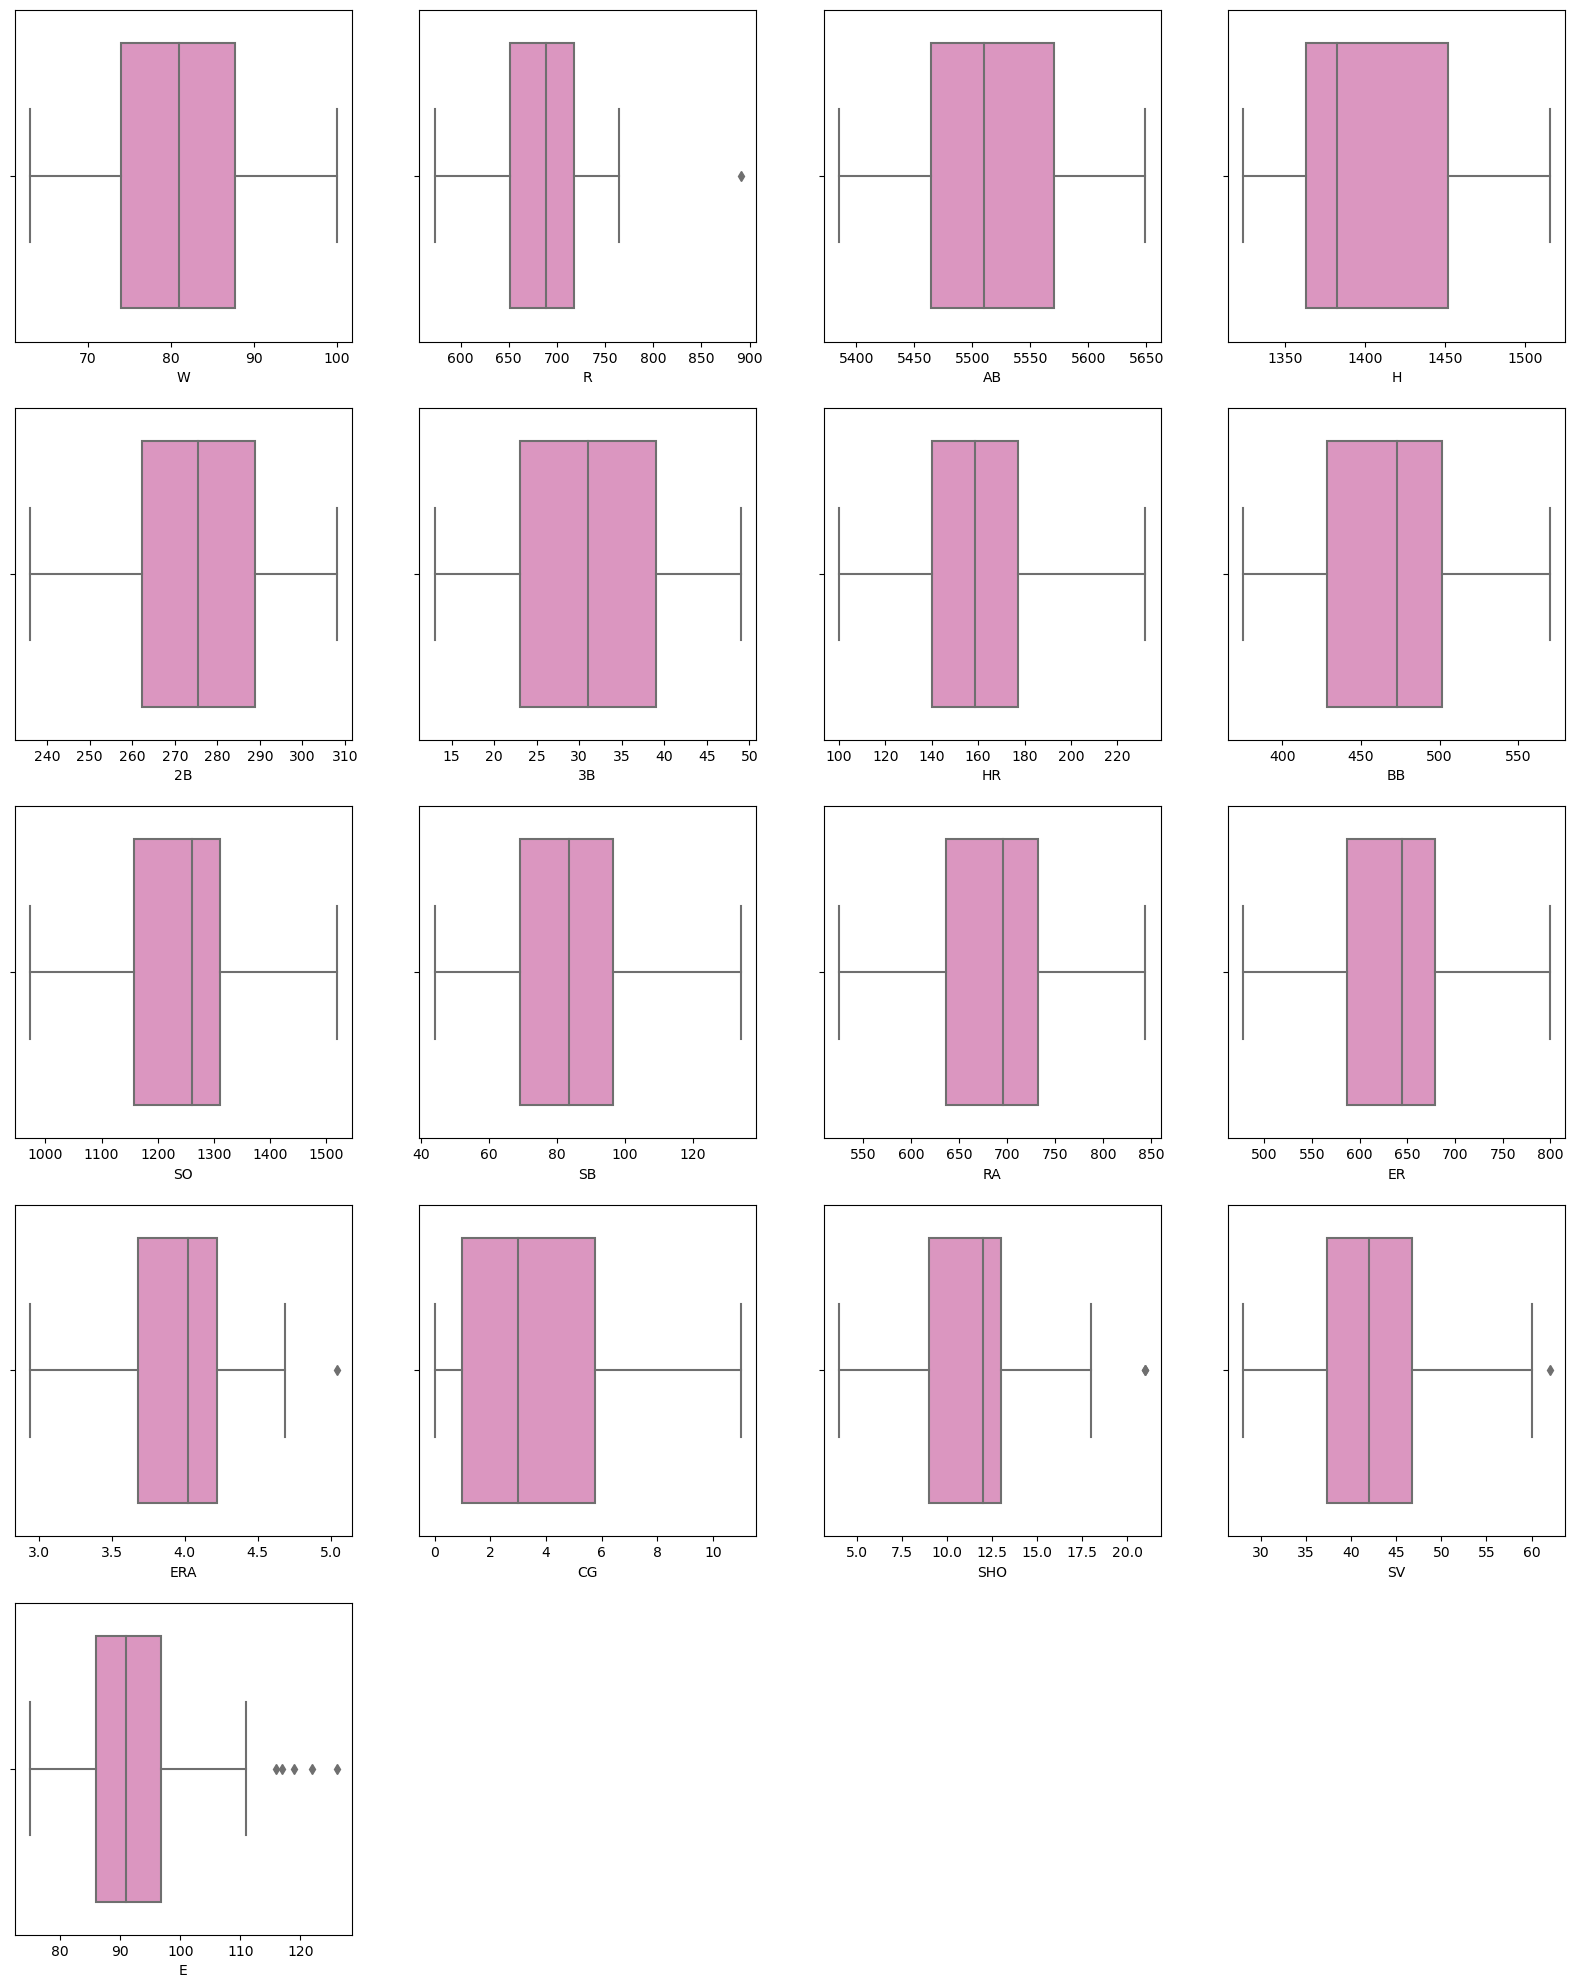

In [21]:
# lets check the outliers using box plot

plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()  

Here we found some of the outliers in R,ERA,SHO,SV and E columns

In [22]:
from scipy.stats import zscore
out_features=df[['R','ERA','SHO','SV','E']]
z=np.abs(zscore(out_features))
z

,R,ERA,SHO,SV,E
0,0.619078,0.506955,0.814629,1.671607,0.461470
1,0.134432,0.254598,0.172800,0.249879,0.607197
2,0.332906,0.641347,0.320914,0.654856,1.117242
3,1.146419,0.053010,0.567771,0.784104,0.485758
4,0.013270,1.531318,0.172800,1.042600,0.607197
5,3.509647,0.350165,0.320914,1.171848,0.461470
6,1.311430,0.165003,1.802057,0.637623,0.097152
7,0.428681,0.209800,0.320914,0.008617,1.262970
8,0.765626,0.484557,0.172800,2.188598,0.048576
9,1.034489,0.792164,0.320914,0.396360,0.194303


In [23]:
# threshold = 3
np.where(z>3)

(array([5], dtype=int64), array([0], dtype=int64))

In [24]:
# now removing the data which is above zscore and creating new df

df1=df[(z<3).all(axis=1)]
df1.shape

(29, 17)

In [25]:
print('Old Dataframe',df.shape)
print('New Dataframe',df1.shape)

Old Dataframe (30, 17)
New Dataframe (29, 17)


In [26]:
print('Data Loss percentage', ((df.shape[0]-df1.shape[0]))/df.shape[0]*100)

Data Loss percentage 3.3333333333333335


We have treated the outliers by using z score and data loss percentage is 3% which is in acceptable range

In [27]:
df=df1

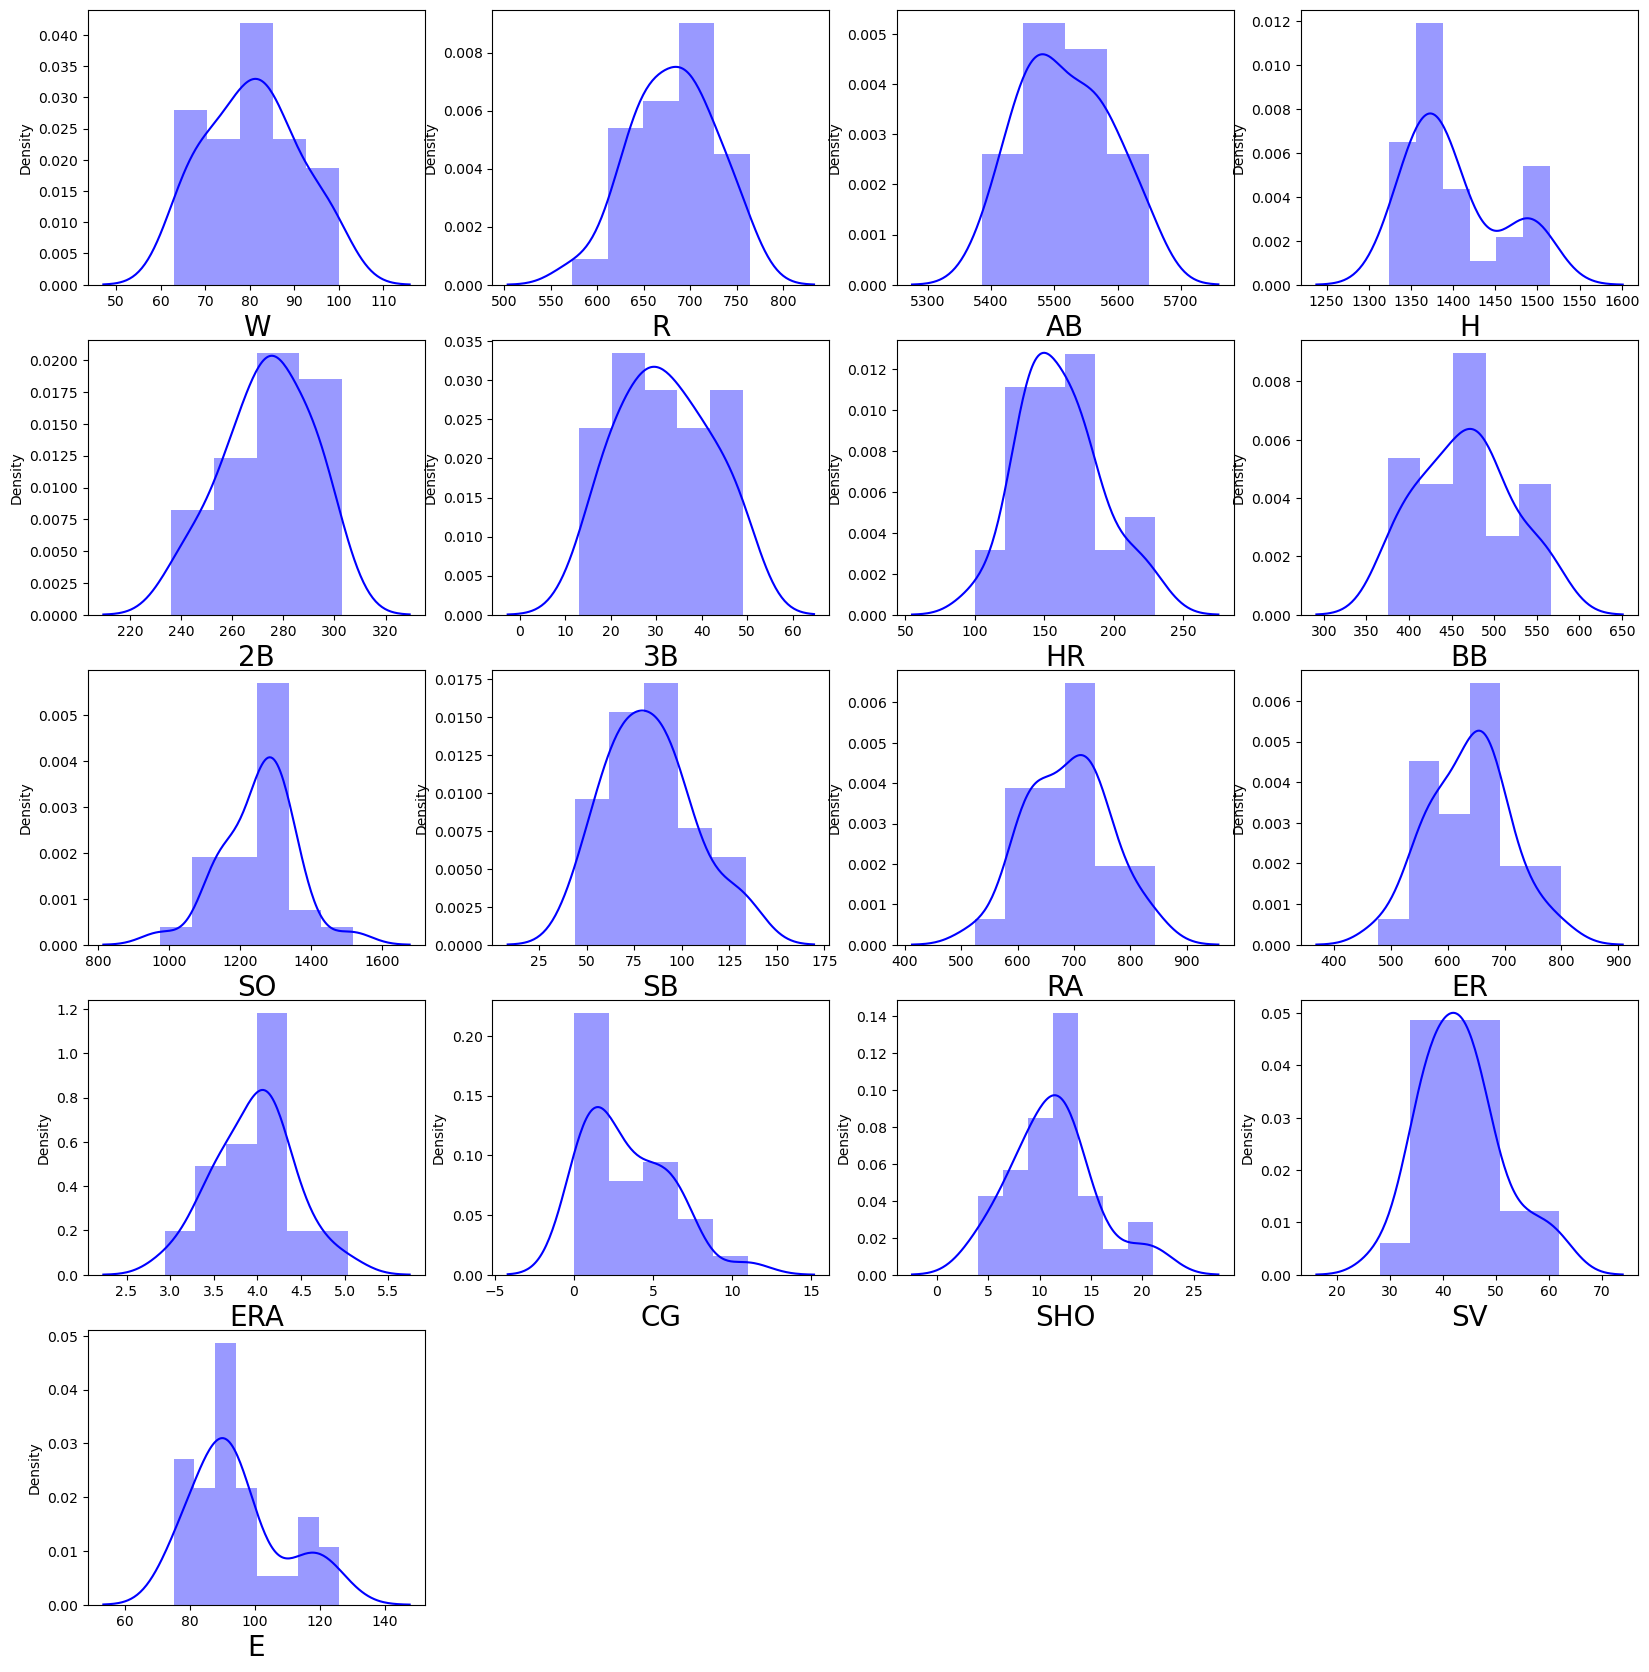

In [28]:
# lets check the distribution of the data using distribution plot

plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=17:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show() 

Here in all columns data is distributed normally

In [29]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Here skewness value is near to the zero hence no need to treat the skewness 

In [30]:
# now we are checking the colinearity issue using corr()

df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


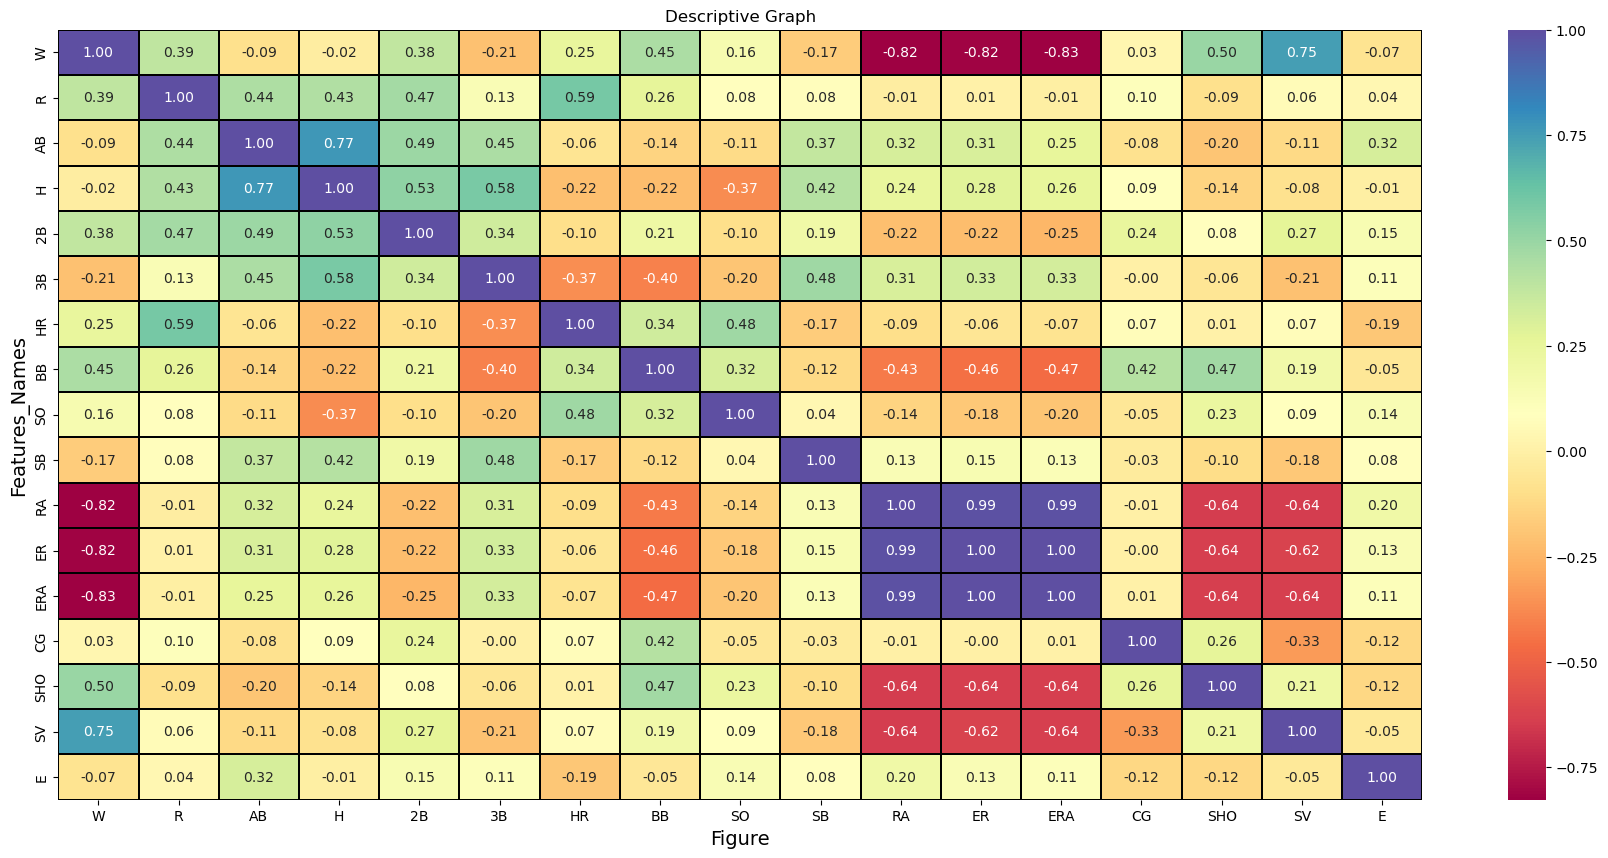

In [31]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True, cmap='Spectral', linecolor='black',linewidth=0.2, fmt='0.2f')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features_Names', fontsize=14)
plt.title('Descriptive Graph')
plt.show()

In [32]:
# separating the indepent and target variables into x and y

x=df.drop('W', axis=1)
y=df['W']

In [33]:
x.shape

(29, 16)

In [34]:
y.shape

(29,)

In [35]:
# feature sclaing using standrd scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.617213,-0.570122,0.211006,1.757915


In [36]:
# finding variance inflation factor in each scaled column i.e., x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns

vif

,VIF Values,Features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


By checking VIF we observe that ER and ERA is highly correlated with other features so we can drop ER as it has high vif value

In [41]:
x.drop('ER',axis=1,inplace=True)
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.363013,0.159299,-1.090948,-0.614898


In [42]:
# finding variance inflation factor in each scaled column i.e., x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns

vif

,VIF Values,Features
0,6.789990,R
1,7.689961,AB
2,9.703669,H
3,3.423326,2B
4,3.268301,3B
5,7.683683,HR
6,3.430050,BB
7,2.713114,SO
8,1.907595,SB
9,144.425392,RA


Now we have overcome with the mulcolineartity issue 

Modelling

In [43]:
#importing necessary libaries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [44]:
# finding the best random state

maxACCU=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=i
print("Maximum r2 score is:", maxACCU,  "on random state:",maxRS) 

Maximum r2 score is: 0.8330900334844975 on random state: 30


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [47]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.8330900334844975
R2_score on training data: 95.00053498119894
Mean absolute error: 3.0998034040926177
Mean Squared Error: 17.956215410075167
Root Mean Squared Error: 4.237477481954938


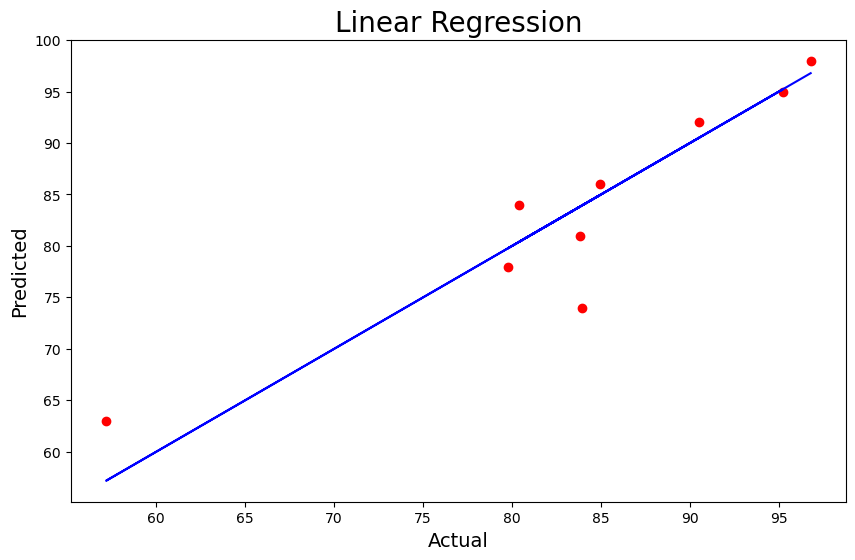

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression', fontsize=20)
plt.show()

In [49]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.6336028115675925
R2_score on training data: 92.64951203810993
Mean absolute error: 4.992222222222221
Mean Squared Error: 39.417099999999984
Root Mean Squared Error: 6.278303911089362


In [50]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.5056506770713793
R2_score on training data: 56.157074803656485
Mean absolute error: 5.866666666666666
Mean Squared Error: 53.18222222222223
Root Mean Squared Error: 7.292614224146388


In [51]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.6378607397469931
R2_score on training data: 99.99999779359706
Mean absolute error: 5.364858321324249
Mean Squared Error: 38.95903103511977
Root Mean Squared Error: 6.241716994154715


In [52]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.9163082084677564
R2_score on training data: 85.11929183090194
Mean absolute error: 2.219528636653747
Mean Squared Error: 9.003583597678654
Root Mean Squared Error: 3.000597206837108


In [53]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.864966765190776
R2_score on training data: 92.75390700801479
Mean absolute error: 3.056525762443766
Mean Squared Error: 14.52690874231578
Root Mean Squared Error: 3.811418206168903


In [54]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.6602019738352076
R2_score on training data: 100.0
Mean absolute error: 5.444444444444445
Mean Squared Error: 36.55555555555556
Root Mean Squared Error: 6.0461190490723515


In [55]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: -0.027648769331775958
R2_score on training data: 22.27067545101592
Mean absolute error: 8.517168650999501
Mean Squared Error: 110.55470834514932
Root Mean Squared Error: 10.514499909417914


In [56]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.677248990130824
R2_score on training data: 100.0
Mean absolute error: 4.398888888888891
Mean Squared Error: 34.72163333333333
Root Mean Squared Error: 5.8925065407968225


In [57]:
from sklearn.model_selection import cross_val_score

In [75]:
score=cross_val_score(LR,x,y,cv=2,scoring='r2')
print(score)
print(score.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_LR)-score.mean())*100)

[-0.99979101 -1.64660382]
-1.3231974138434208
Difference betweem r score and Cv is :  215.62874473279186


In [76]:
score1=cross_val_score(RFR,x,y,cv=2,scoring='r2')
print(score1)
print(score1.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_RFR)-score1.mean())*100)

[-0.06981267  0.24796599]
0.08907665933169329
Difference betweem r score and Cv is :  54.452615223589916


In [77]:
score2=cross_val_score(knn,x,y,cv=2,scoring='r2')
print(score2)
print(score2.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.07302452 0.28782167]
0.18042309515575172
Difference betweem r score and Cv is :  32.52275819156276


In [78]:
score3=cross_val_score(GBR,x,y,cv=2,scoring='r2')
print(score3)
print(score3.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_GBR)-score3.mean())*100)

[-0.44399293  0.31998032]
-0.06200630598572049
Difference betweem r score and Cv is :  69.98670457327137


In [79]:
score4=cross_val_score(lasso,x,y,cv=2,scoring='r2')
print(score4)
print(score4.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_lasso)-score4.mean())*100)

[0.65792377 0.70115516]
0.6795394622657435
Difference betweem r score and Cv is :  23.676874620201293


In [80]:
score5=cross_val_score(rd,x,y,cv=2,scoring='r2')
print(score5)
print(score5.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_rd)-score5.mean())*100)

[0.48530756 0.67649961]
0.5809035893019076
Difference betweem r score and Cv is :  28.406317588886843


In [81]:
score6=cross_val_score(dtr,x,y,cv=2,scoring='r2')
print(score6)
print(score6.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[-0.04546106 -0.15785652]
-0.10165879229036578
Difference betweem r score and Cv is :  76.18607661255734


In [82]:
score7=cross_val_score(svr,x,y,cv=2,scoring='r2')
print(score7)
print(score7.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_svr)-score7.mean())*100)

[-0.34514842 -0.02251899]
-0.18383370198839977
Difference betweem r score and Cv is :  15.61849326566238


In [83]:
score8=cross_val_score(etr,x,y,cv=2,scoring='r2')
print(score8)
print(score8.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_etr)-score8.mean())*100)

[-0.0181542   0.26968861]
0.1257672026987502
Difference betweem r score and Cv is :  55.148178743207374


Here Lasso is our best fit model as difference between CV and r2 score is least

In [87]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': (np.logspace(-8, 8, 100))}
gscv=GridSearchCV(Lasso(),params,cv=2)
gscv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [88]:
gscv.best_params_

{'alpha': 1.74752840000769}

In [89]:
Model=Lasso(alpha=1.74752840000769)

In [90]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred_rd))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.864966765190776
Mean absolute error: 3.3116523673707707
Mean Squared Error: 16.800161257101124
Root Mean Squared Error: 4.098799977688729


In [92]:
#saving model

import joblib
import pickle
filename='Baseball Case Study.pkl'
pickle.dump(Model,open(filename,'wb')) 

In [93]:
import pickle
loaded_model=pickle.load(open('Baseball Case Study.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.3836003921828


In [94]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,91.770993,76.537845,82.40519,84.806884,67.441111,88.404543,78.526399,80.496672,85.816201
Original,98.000000,74.000000,84.00000,86.000000,63.000000,95.000000,78.000000,81.000000,92.000000
